In [1]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio
pio.templates.default = "plotly_white"

In [2]:
df = pd.read_csv('/Users/ishikadang/Downloads/credit_scoring.csv')

In [3]:
df

Age  Gender Marital Status Education Level Employment Status  \
0     60    Male        Married          Master          Employed   
1     25    Male        Married     High School        Unemployed   
2     30  Female         Single          Master          Employed   
3     58  Female        Married             PhD        Unemployed   
4     32    Male        Married        Bachelor     Self-Employed   
..   ...     ...            ...             ...               ...   
995   59    Male       Divorced     High School          Employed   
996   64    Male       Divorced        Bachelor        Unemployed   
997   63  Female         Single          Master     Self-Employed   
998   51  Female        Married             PhD     Self-Employed   
999   37  Female        Married          Master     Self-Employed   

     Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                        0.22           2685.0                          2   
1                        0.20           2371.0                          9   
2                        0.22           2771.0                          6   
3                        0.12           1371.0                          2   
4                        0.99            828.0                          2   
..                        ...              ...                        ...   
995                      0.74           1285.0                          8   
996                      0.77           1857.0                          2   
997                      0.18           2628.0                         10   
998                      0.32           1142.0                          3   
999                      0.17           1028.0                          5   

     Loan Amount  Interest Rate  Loan Term   Type of Loan  
0        4675000           2.65         48  Personal Loan  
1        3619000           5.19         60      Auto Loan  
2         957000           2.76         12      Auto Loan  
3        4731000           6.57         60      Auto Loan  
4        3289000           6.28         36  Personal Loan  
..           ...            ...        ...            ...  
995      3530000          12.99         48      Auto Loan  
996      1377000          18.02         60      Home Loan  
997      2443000          18.95         12  Personal Loan  
998      1301000           1.80         24      Auto Loan  
999      4182000           9.34         24      Auto Loan  

[1000 rows x 12 columns]

In [4]:
df.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

In [5]:
df.describe()

Age  Credit Utilization Ratio  Payment History  \
count  1000.000000               1000.000000      1000.000000   
mean     42.702000                  0.509950      1452.814000   
std      13.266771                  0.291057       827.934146   
min      20.000000                  0.000000         0.000000   
25%      31.000000                  0.250000       763.750000   
50%      42.000000                  0.530000      1428.000000   
75%      54.000000                  0.750000      2142.000000   
max      65.000000                  1.000000      2857.000000   

       Number of Credit Accounts   Loan Amount  Interest Rate    Loan Term  
count                1000.000000  1.000000e+03    1000.000000  1000.000000  
mean                    5.580000  2.471401e+06      10.686600    37.128000  
std                     2.933634  1.387047e+06       5.479058    17.436274  
min                     1.000000  1.080000e+05       1.010000    12.000000  
25%                     3.000000  1.298000e+06       6.022500    24.000000  
50%                     6.000000  2.437500e+06      10.705000    36.000000  
75%                     8.000000  3.653250e+06      15.440000    48.000000  
max                    10.000000  4.996000e+06      19.990000    60.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
df['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [8]:
df['Education Level'].unique()

array(['Master', 'High School', 'PhD', 'Bachelor'], dtype=object)

In [9]:
df['Education Level'].unique()

array(['Master', 'High School', 'PhD', 'Bachelor'], dtype=object)

In [10]:
df['Employment Status'].unique()

array(['Employed', 'Unemployed', 'Self-Employed'], dtype=object)

In [11]:
df['Type of Loan'].unique()

array(['Personal Loan', 'Auto Loan', 'Home Loan'], dtype=object)

#### Type of Loan

In [12]:
df['Type of Loan'].value_counts()

Auto Loan        348
Home Loan        328
Personal Loan    324
Name: Type of Loan, dtype: int64

<Axes: ylabel='Type of Loan'>

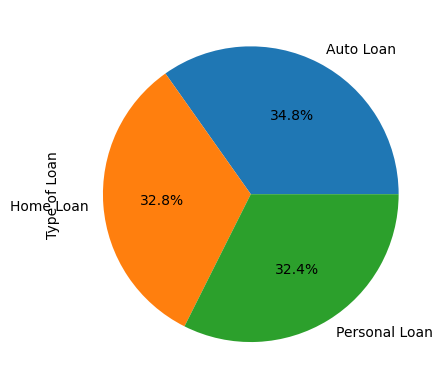

In [13]:
df["Type of Loan"].value_counts().plot.pie(autopct = "%1.1f%%")

In [14]:
credit_utilization_fig = px.box(df, y='Credit Utilization Ratio',
                                title='Credit Utilization Ratio Distribution')
credit_utilization_fig.show()

In [15]:
loan_amount_fig = px.histogram(df, x='Loan Amount', 
                               nbins=20, 
                               title='Loan Amount Distribution')
loan_amount_fig.show()

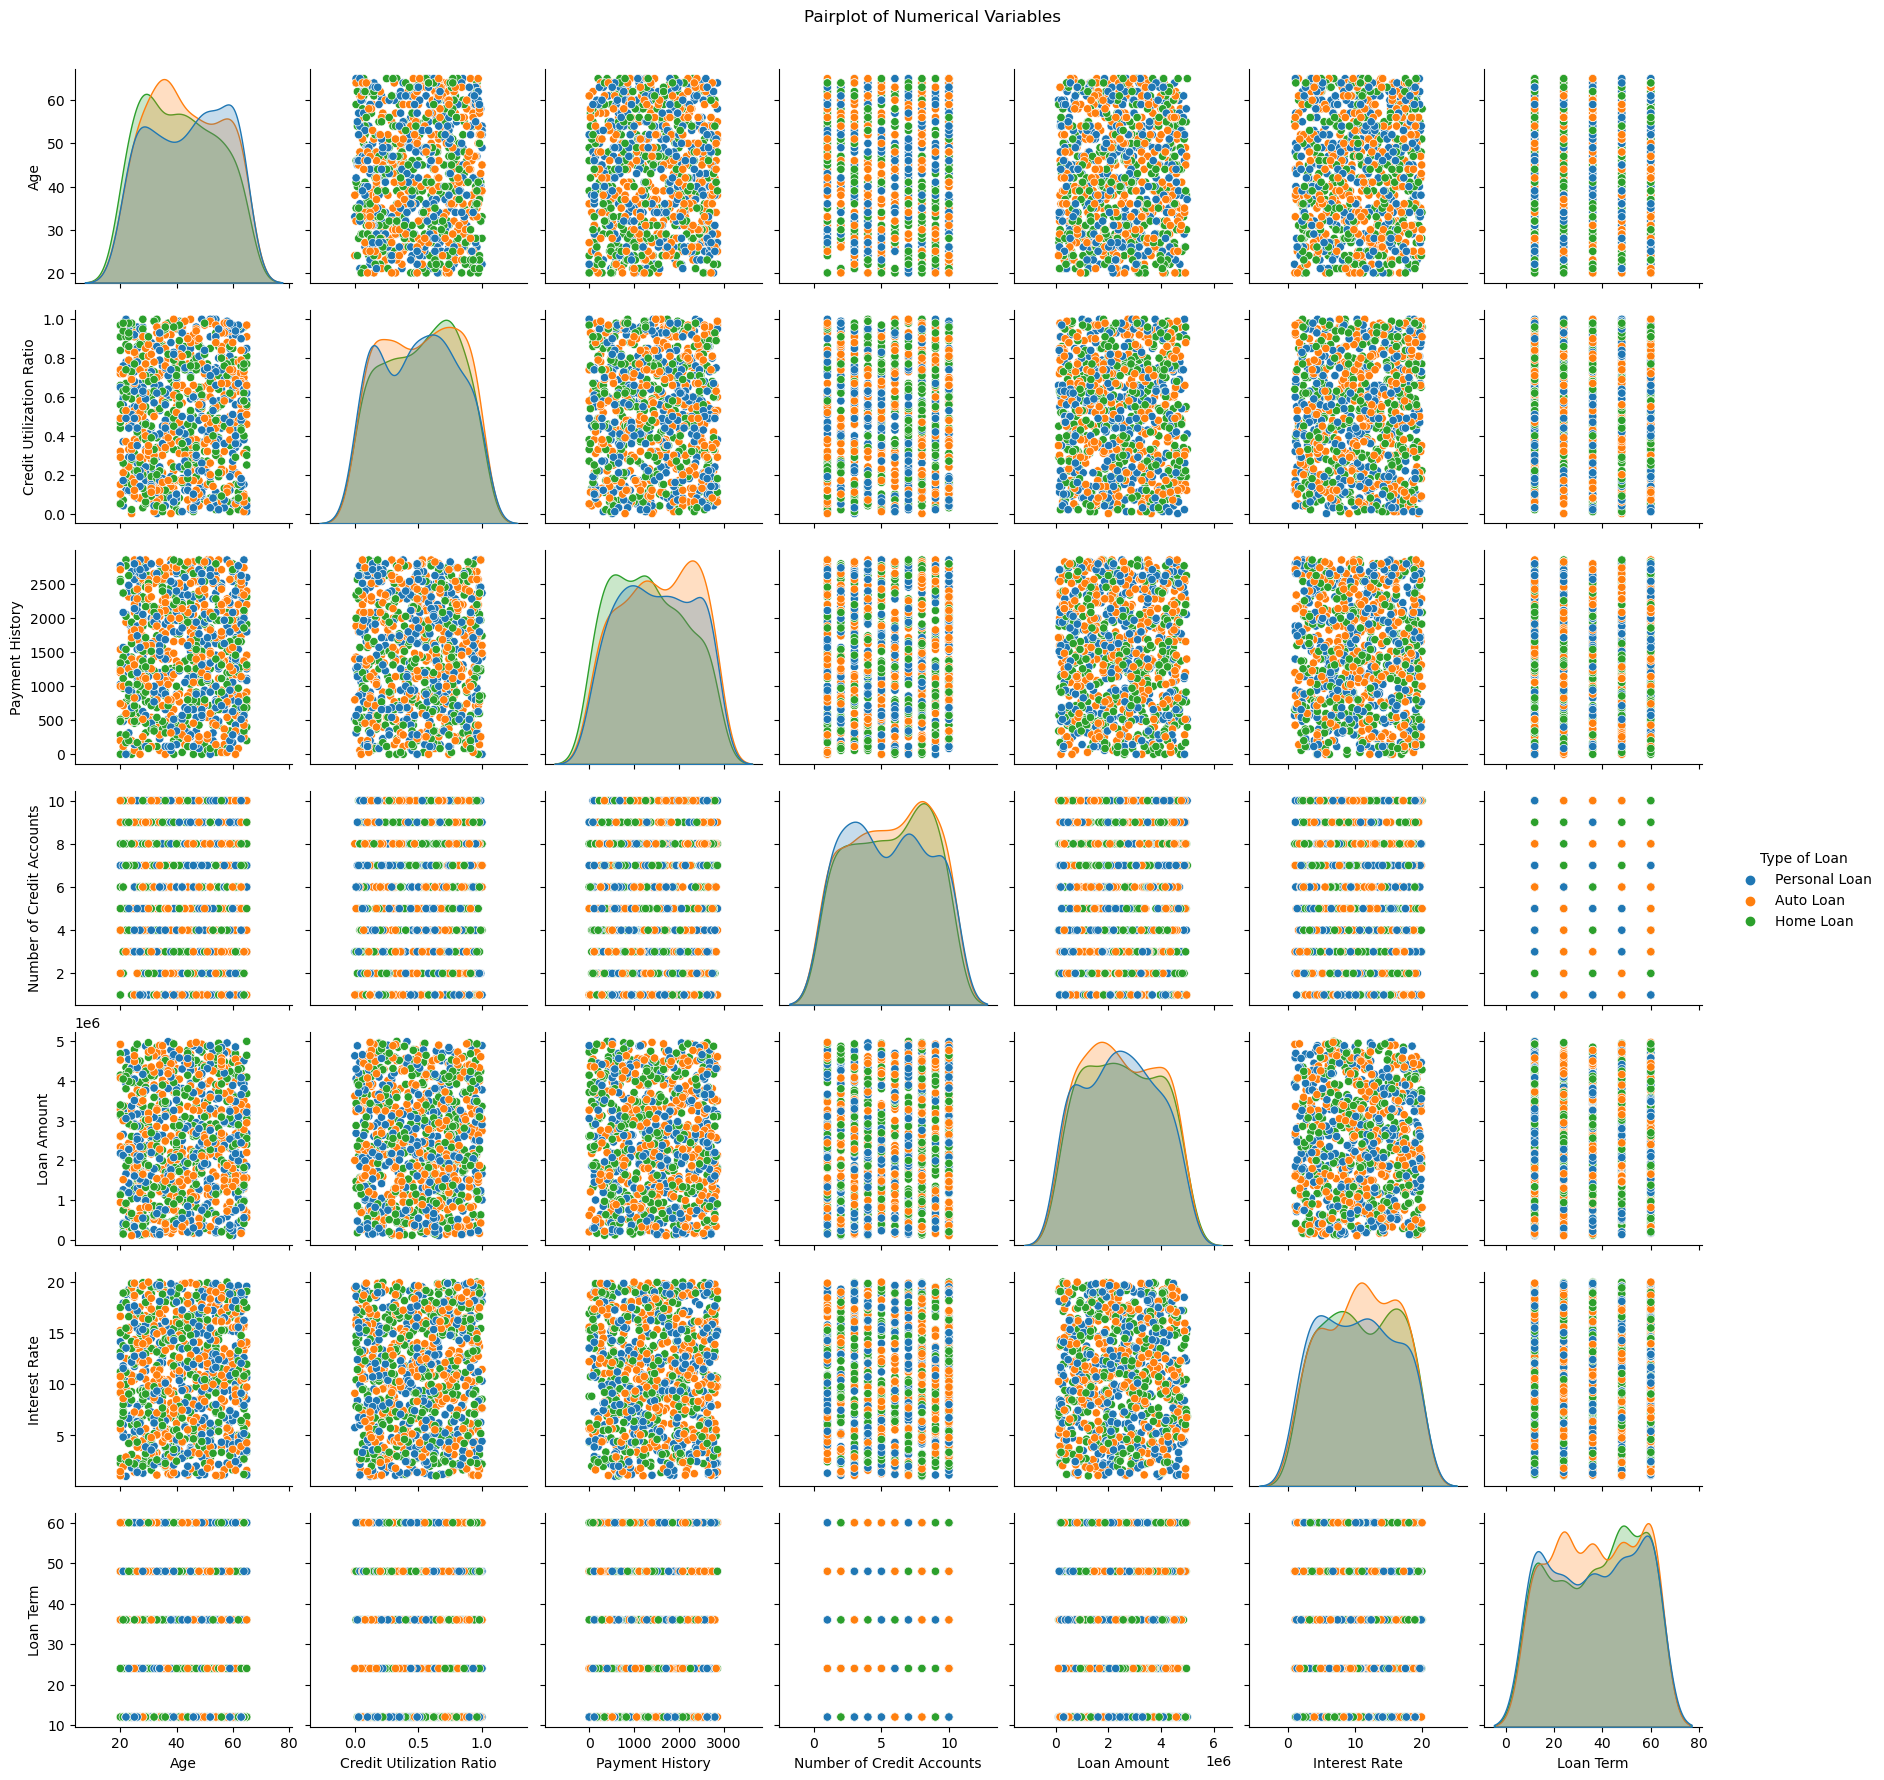

In [16]:
sns.pairplot(df, hue='Type of Loan')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


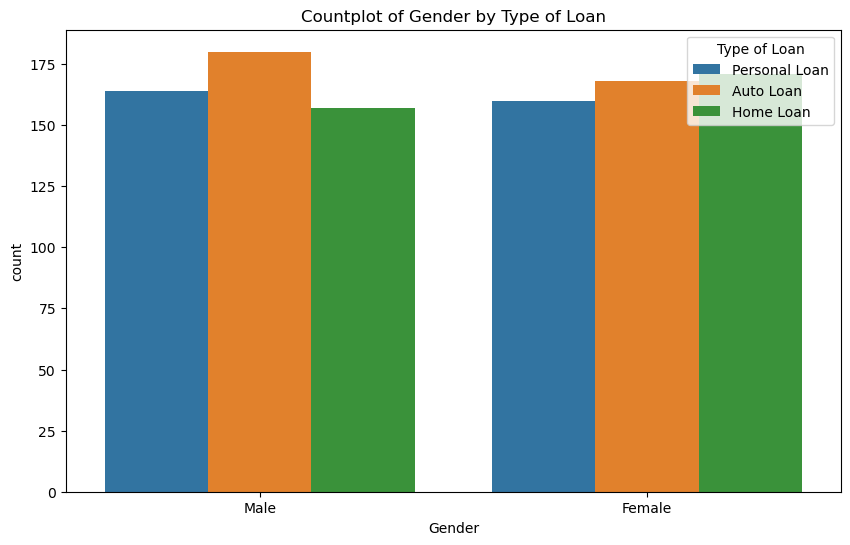

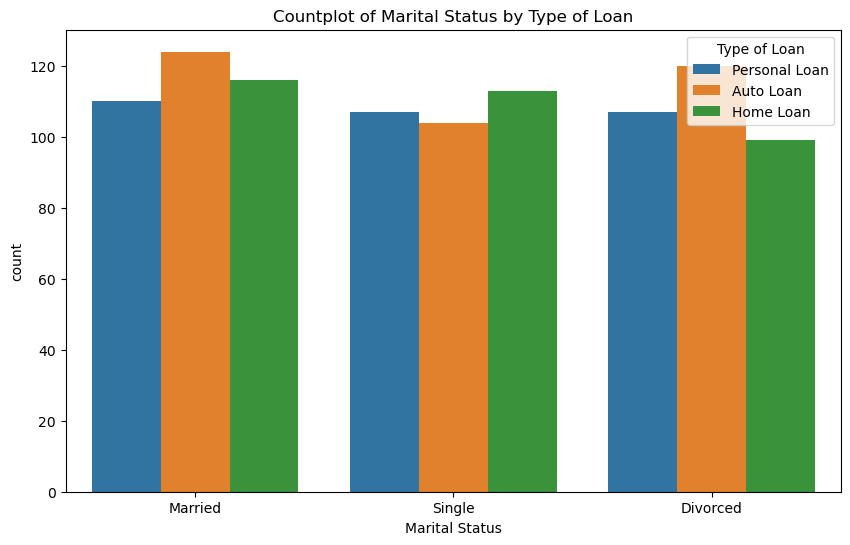

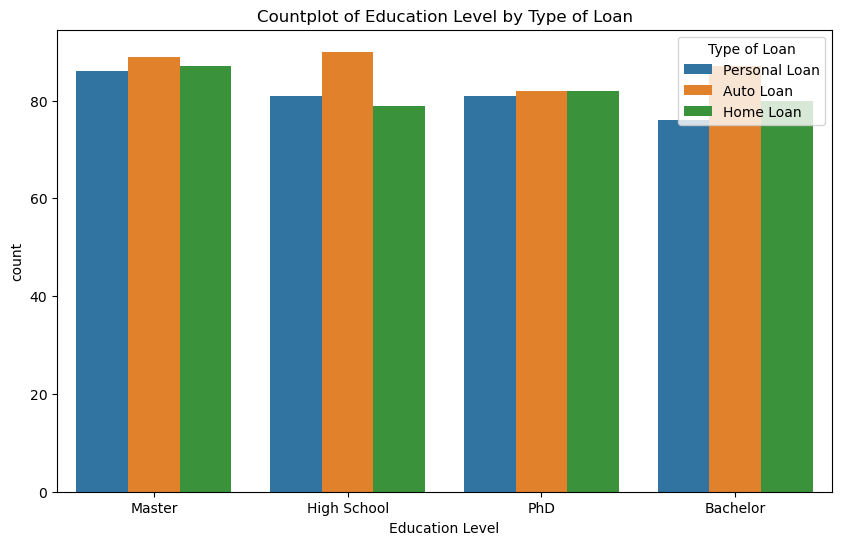

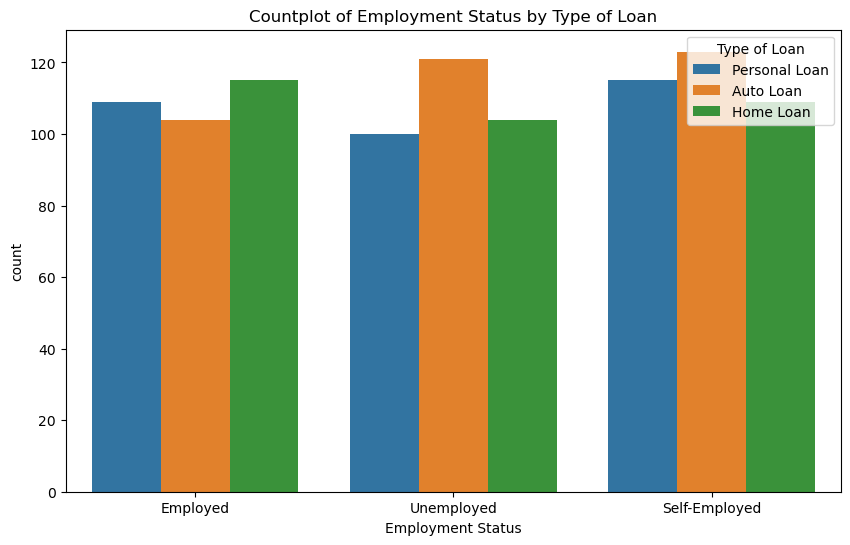

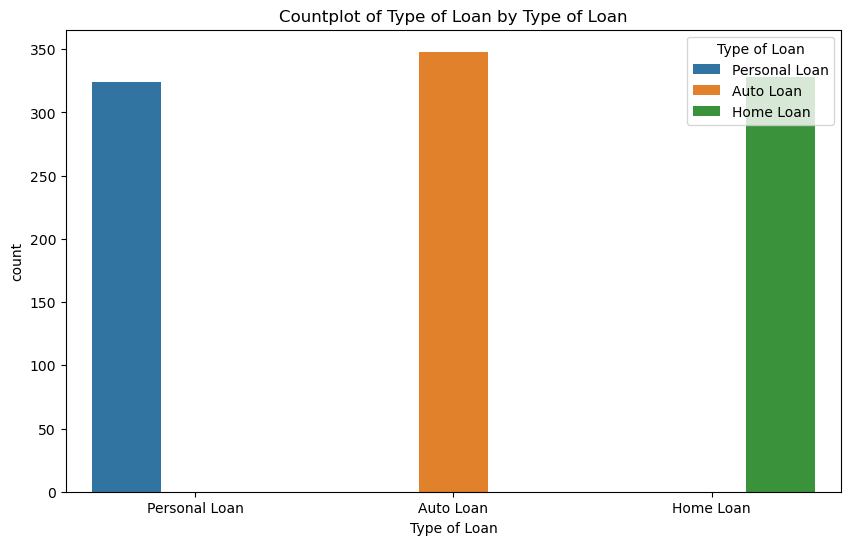

In [17]:
categorical_vars = ['Gender', 'Marital Status', 'Education Level', 'Employment Status', 'Type of Loan']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df, hue='Type of Loan')
    plt.title(f'Countplot of {var} by Type of Loan')
    plt.show()

In [18]:
numeric_df = df[['Credit Utilization Ratio', 
                   'Payment History', 
                   'Number of Credit Accounts', 
                   'Loan Amount', 'Interest Rate', 
                   'Loan Term']]
correlation_fig = px.imshow(numeric_df.corr(), 
                            title='Correlation Heatmap')
correlation_fig.show()

 #### FICO score method to calculate credit scores:
 
 
35% weight for “Payment History”, 

30% weight for “Credit Utilization Ratio”,

15% weight for “Number of Credit Accounts”,

10% weight for “Education Level”,

and 10% weight for “Employment Status”. 





In [19]:

education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}



df['Education Level'] = df['Education Level'].map(education_level_mapping)
df['Employment Status'] = df['Employment Status'].map(employment_status_mapping)


credit_scores = []

for index, row in df.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']

    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)

df['Credit Score'] = credit_scores

print(df.head())

   Age  Gender Marital Status  Education Level  Employment Status  \
0   60    Male        Married                3                  1   
1   25    Male        Married                1                  0   
2   30  Female         Single                3                  1   
3   58  Female        Married                4                  0   
4   32    Male        Married                2                  2   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  Credit Score  
0      4675000           2.65         48  Personal Loan       

In [20]:
df.head()

Age  Gender Marital Status  Education Level  Employment Status  \
0   60    Male        Married                3                  1   
1   25    Male        Married                1                  0   
2   30  Female         Single                3                  1   
3   58  Female        Married                4                  0   
4   32    Male        Married                2                  2   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  Credit Score  
0      4675000           2.65         48  Personal Loan       940.516  
1      3619000           5.19         60      Auto Loan       831.360  
2       957000           2.76         12      Auto Loan       971.216  
3      4731000           6.57         60      Auto Loan       480.586  
4      3289000           6.28         36  Personal Loan       290.797

#### Segmentation Based on Credit Scores

In [21]:
print(df['Credit Score'].isnull().sum())

0


In [22]:
print(df['Credit Score'].dtype)

float64


In [23]:
from sklearn.cluster import KMeans

X = df[['Credit Score']]
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X)
df['Segment'] = kmeans.labels_

In [24]:

df['Segment'] = df['Segment'].astype('category')


fig = px.scatter(df, x=df.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

In [25]:
df['Segment'] = df['Segment'].map({2: 'Very Low', 
                                       0: 'Low',
                                       1: 'Good',
                                       3: "Excellent"})


df['Segment'] = df['Segment'].astype('category')


fig = px.scatter(df, x=df.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()